In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from scikeras.wrappers import KerasClassifier

In [29]:
df=pd.read_csv('processed.csv')
print('Data shape:',df.shape)

Data shape: (1069, 22)


In [30]:
list(enumerate(df.columns))

[(0, 'w/b'),
 (1, 'Water'),
 (2, 'Cement type'),
 (3, 'Cement'),
 (4, 'Slag'),
 (5, 'Fly ash'),
 (6, 'Silica fume'),
 (7, 'Lime filler'),
 (8, 'FA'),
 (9, 'CA'),
 (10, 'Plasticizer'),
 (11, 'Superplasticizer'),
 (12, 'Air entraining'),
 (13, 'Comp. str. test age'),
 (14, 'Compressive strength'),
 (15, 'Air content'),
 (16, 'Spreed'),
 (17, 'Slump'),
 (18, 'Fresh density'),
 (19, 'Dry  density'),
 (20, 'Migration test age'),
 (21, 'Migration resistance')]

1-hot encoding

In [31]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X=ct.fit_transform(df)
# remove dummy variable and output
y=X[:,-1]
X=X[:,1:-1]
print(X.shape)
print(y.shape)

(1069, 30)
(1069,)


ANN

In [32]:
def get_ann(optimizer='rmsprop', init='glorot_uniform'):
    ann=keras.models.Sequential()
    ann.add(keras.layers.Dense(60,activation='relu',kernel_initializer=init,
                            input_shape=(X.shape[1],)))
    ann.add(keras.layers.Dense(32,activation='relu'))
    ann.add(keras.layers.Dense(32,activation='relu'))
    ann.add(keras.layers.Dense(5,activation='softmax'))
    ann.compile(optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return ann

d:\College files\9th sem\mtp\code\.venv\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'batch_size': 32, 'epochs': 400, 'model__init': 'normal', 'optimizer': 'rmsprop'}


d:\College files\9th sem\mtp\code\.venv\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'batch_size': 32, 'epochs': 200, 'model__init': 'normal', 'optimizer': 'adam'}


d:\College files\9th sem\mtp\code\.venv\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'batch_size': 64, 'epochs': 400, 'model__init': 'normal', 'optimizer': 'rmsprop'}


d:\College files\9th sem\mtp\code\.venv\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'batch_size': 32, 'epochs': 200, 'model__init': 'normal', 'optimizer': 'rmsprop'}


d:\College files\9th sem\mtp\code\.venv\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'batch_size': 64, 'epochs': 400, 'model__init': 'glorot_uniform', 'optimizer': 'adam'}


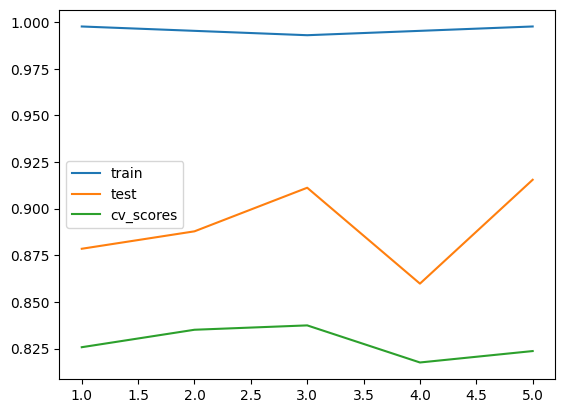

In [33]:
acc_train=[]
acc_test=[]
cv_scores=[]
param_grid={
    'optimizer': ['rmsprop', 'adam'],
    'model__init': ['glorot_uniform', 'normal', 'uniform'],
    'epochs': [200,400],
    'batch_size': [32,64]
}
splits=list(KFold(shuffle=True,random_state=0).split(X,y))
for train_index, test_index in splits:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    grid=GridSearchCV(KerasClassifier(get_ann,verbose=0),
                      param_grid,cv=5,n_jobs=2,scoring='accuracy')
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    cv_scores.append(grid.best_score_)
    acc_train.append(accuracy_score(y_train,grid.predict(X_train)))
    acc_test.append(accuracy_score(y_test,grid.predict(X_test)))
plt.plot(range(1,6),acc_train)
plt.plot(range(1,6),acc_test)
plt.plot(range(1,6),cv_scores)
plt.legend(['train','test','cv_scores'])